# Lateral ventricle volume trajectories and response inhibition - prep

Copyright (c) 2019, Arvid Lundervold

*Astri J. Lundervold, Alexandra Vik, Arvid Lundervold* <br>
**Lateral ventricle volume trajectories predict response inhibition in older age - a
longitudinal brain imaging and machine learning approach** (to appear in PLOS ONE)


## Prepare
Data being used is derived from the original data processed from Freesurfer longitudinal stream, and results form the four conditions on the CWIT test at Wave 3.

### Packages and libraries

In [21]:
# Enable inline plotting
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading and exploring data

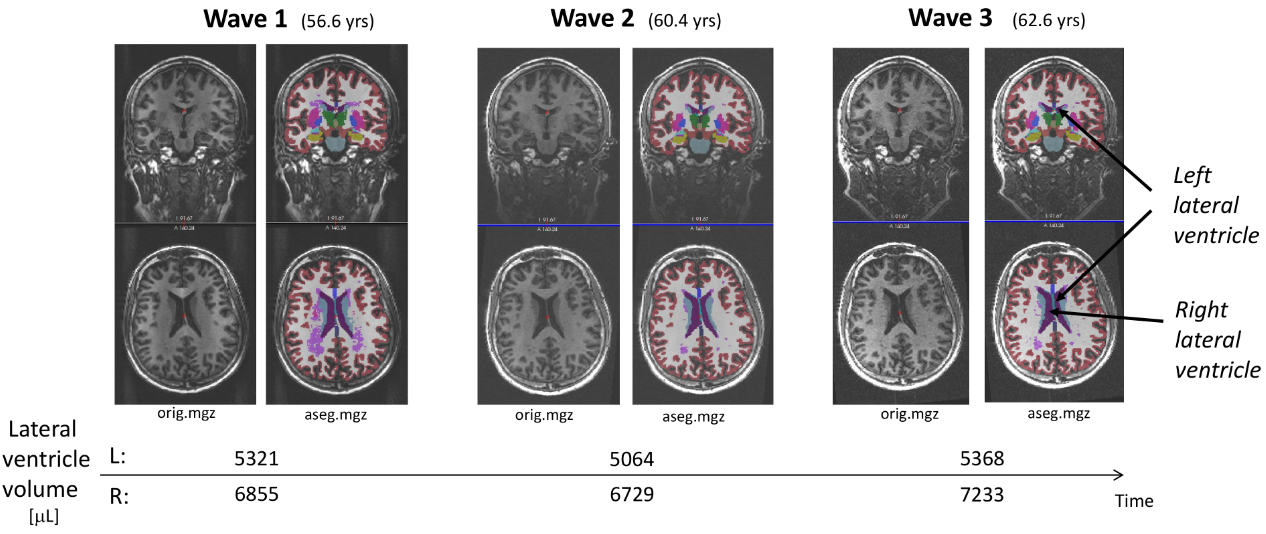

In [22]:
from IPython.display import Image
Image(filename='../assets/Figure1.png', width=800)

In [23]:
fn_data = '../data/lvv_ri_data.csv'
fn_cwit = '../data/cwit_data.csv'
df = pd.read_csv(fn_data)
df_cwit = pd.read_csv(fn_cwit)

### Explore data

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 13 columns):
Subject                             74 non-null object
Sex                                 74 non-null object
AcquisitionYearsW1                  74 non-null float64
AcquisitionYearsW2                  74 non-null float64
AcquisitionYearsW3                  74 non-null float64
Left-Lateral-Ventricle_W1           74 non-null float64
Left-Lateral-Ventricle_W2           74 non-null float64
Left-Lateral-Ventricle_W3           74 non-null float64
Right-Lateral-Ventricle_W1          74 non-null float64
Right-Lateral-Ventricle_W2          74 non-null float64
Right-Lateral-Ventricle_W3          74 non-null float64
EstimatedTotalIntraCranialVol_W3    74 non-null float64
Stroop_3_R_W3                       74 non-null float64
dtypes: float64(11), object(2)
memory usage: 7.6+ KB


In [25]:
df_cwit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 6 columns):
Subject          74 non-null object
Sex              74 non-null object
Stroop_1_R_W3    74 non-null float64
Stroop_2_R_W3    74 non-null float64
Stroop_3_R_W3    74 non-null float64
Stroop_4_R_W3    74 non-null float64
dtypes: float64(4), object(2)
memory usage: 3.5+ KB


In [26]:
df.head(5).T

,0,1,2,3,4
Subject,subj_01,subj_02,subj_03,subj_04,subj_05
Sex,F,M,M,M,M
AcquisitionYearsW1,56.63,49.07,74.61,56.23,63.22
AcquisitionYearsW2,60.35,52.58,78.14,59.78,67
AcquisitionYearsW3,62.62,55.05,80.59,62.68,69.53
Left-Lateral-Ventricle_W1,5321.4,11038.6,29718.4,21830.1,17205.1
Left-Lateral-Ventricle_W2,5063.6,11912.2,32265.1,23933.6,16970.1
Left-Lateral-Ventricle_W3,5368.3,12313.3,35887,26164.2,15858.1
Right-Lateral-Ventricle_W1,6855.2,10611.6,34241,15243.9,13962.1
Right-Lateral-Ventricle_W2,6729.2,11774.8,37155.2,16505.1,13755.5


In [27]:
df_cwit.head(5).T

,0,1,2,3,4
Subject,subj_01,subj_02,subj_03,subj_04,subj_05
Sex,F,M,M,M,M
Stroop_1_R_W3,34,41,35,21,38
Stroop_2_R_W3,19,29,19,20,21
Stroop_3_R_W3,66,85,71,41,62
Stroop_4_R_W3,92,90,79,96,80


In [28]:
df.describe(percentiles = [.5]).T.round(2)

,count,mean,std,min,50%,max
AcquisitionYearsW1,74.0,60.75,7.25,46.66,59.88,77.63
AcquisitionYearsW2,74.0,64.28,7.21,50.11,63.56,81.33
AcquisitionYearsW3,74.0,66.81,7.19,52.46,66.02,84.05
Left-Lateral-Ventricle_W1,74.0,14994.10,8584.68,5303.10,12259.60,54646.70
Left-Lateral-Ventricle_W2,74.0,16450.17,9589.52,5063.60,13288.65,58559.10
Left-Lateral-Ventricle_W3,74.0,17605.22,10354.05,5235.00,14225.50,61501.40
Right-Lateral-Ventricle_W1,74.0,13777.28,7743.45,4408.30,12181.85,40721.30
Right-Lateral-Ventricle_W2,74.0,15183.76,8738.59,3777.00,13089.90,47038.50
Right-Lateral-Ventricle_W3,74.0,16381.11,9646.09,3810.20,13732.20,52859.40
EstimatedTotalIntraCranialVol_W3,74.0,1360709.41,151345.90,1053942.81,1372028.98,1766114.25


In [29]:
df['Sex'].value_counts()

F    48
M    26
Name: Sex, dtype: int64

In [30]:
rename_dict = {
    'Subject': 'subj',
    'Sex': 'gender',
    'AcquisitionYearsW1': 'yrW1',
    'AcquisitionYearsW2': 'yrW2',
    'AcquisitionYearsW3': 'yrW3',
    'Left-Lateral-Ventricle_W1': 'left_lvvW1',
    'Left-Lateral-Ventricle_W2': 'left_lvvW2',
    'Left-Lateral-Ventricle_W3': 'left_lvvW3',
    'Right-Lateral-Ventricle_W1': 'right_lvvW1',
    'Right-Lateral-Ventricle_W2': 'right_lvvW2',
    'Right-Lateral-Ventricle_W3': 'right_lvvW3',
    'EstimatedTotalIntraCranialVol_W3': 'eTIV',
    'Stroop_3_R_W3': 'RI'   
}

In [31]:
df.rename(columns = rename_dict, inplace = True)

In [32]:
df.head(5).T

,0,1,2,3,4
subj,subj_01,subj_02,subj_03,subj_04,subj_05
gender,F,M,M,M,M
yrW1,56.63,49.07,74.61,56.23,63.22
yrW2,60.35,52.58,78.14,59.78,67
yrW3,62.62,55.05,80.59,62.68,69.53
left_lvvW1,5321.4,11038.6,29718.4,21830.1,17205.1
left_lvvW2,5063.6,11912.2,32265.1,23933.6,16970.1
left_lvvW3,5368.3,12313.3,35887,26164.2,15858.1
right_lvvW1,6855.2,10611.6,34241,15243.9,13962.1
right_lvvW2,6729.2,11774.8,37155.2,16505.1,13755.5


In [33]:
# Preliminary exploration across gender
pd.DataFrame(df.describe(percentiles=[0.5]).T.round(1))

,count,mean,std,min,50%,max
yrW1,74.0,60.7,7.3,46.7,59.9,77.6
yrW2,74.0,64.3,7.2,50.1,63.6,81.3
yrW3,74.0,66.8,7.2,52.5,66.0,84.0
left_lvvW1,74.0,14994.1,8584.7,5303.1,12259.6,54646.7
left_lvvW2,74.0,16450.2,9589.5,5063.6,13288.6,58559.1
left_lvvW3,74.0,17605.2,10354.0,5235.0,14225.5,61501.4
right_lvvW1,74.0,13777.3,7743.4,4408.3,12181.8,40721.3
right_lvvW2,74.0,15183.8,8738.6,3777.0,13089.9,47038.5
right_lvvW3,74.0,16381.1,9646.1,3810.2,13732.2,52859.4
eTIV,74.0,1360709.4,151345.9,1053942.8,1372029.0,1766114.3


In [34]:
# Preliminary exploration across gender
pd.DataFrame(df_cwit.describe(percentiles=[0.5]).T.round(1))

,count,mean,std,min,50%,max
Stroop_1_R_W3,74.0,29.9,5.4,20.0,30.0,52.0
Stroop_2_R_W3,74.0,22.2,4.5,14.0,21.0,39.0
Stroop_3_R_W3,74.0,57.0,14.5,35.0,54.5,102.0
Stroop_4_R_W3,74.0,69.9,22.0,36.0,64.5,136.0


In [35]:
# Preliminary exploration by gender
pd.DataFrame(df.groupby('gender').describe(percentiles=[0.5]).T.unstack().T.round(1))

yrW1  yrW2  yrW3  left_lvvW1  left_lvvW2  left_lvvW3  \
gender                                                               
F      count  48.0  48.0  48.0        48.0        48.0        48.0   
       mean   60.4  63.9  66.4     12611.4     13866.6     14850.6   
       std     7.0   6.9   6.9      6871.8      7912.8      8673.0   
       min    46.7  50.4  52.6      5303.1      5063.6      5368.3   
       50%    59.6  63.2  65.5     10431.0     11452.1     12758.2   
       max    74.7  78.4  80.5     36640.3     43187.6     49001.3   
M      count  26.0  26.0  26.0        26.0        26.0        26.0   
       mean   61.5  65.0  67.5     19392.9     21219.8     22690.8   
       std     7.8   7.8   7.8      9766.9     10692.7     11408.8   
       min    46.7  50.1  52.5      7370.7      5242.4      5235.0   
       50%    60.6  64.1  66.8     17385.6     19803.8     21554.0   
       max    77.6  81.3  84.0     54646.7     58559.1     61501.4   

              right_lvvW1  right_lvvW2  right_lvvW3       eTIV     RI  
gender                                                                 
F      count         48.0         48.0         48.0       48.0   48.0  
       mean       11688.7      12889.2      13979.4  1293810.5   56.0  
       std         6948.3       8017.2       8999.6   122832.7   15.0  
       min         4907.2       4642.7       5100.4  1053942.8   35.0  
       50%         9300.2      10424.4      11196.5  1290039.8   52.5  
       max        40721.3      47038.5      52859.4  1575329.9  102.0  
M      count         26.0         26.0         26.0       26.0   26.0  
       mean       17633.0      19419.9      20815.0  1484215.2   58.8  
       std         7777.2       8565.7       9376.1   118584.9   13.6  
       min         4408.3       3777.0       3810.2  1223126.9   40.0  
       50%        14622.0      17119.0      18507.2  1482445.2   57.0  
       max        37379.1      40134.6      42271.7  1766114.3   94.0

In [36]:
# Save data frame with renamed columns
df.to_csv('../data/01_lvv_ri_renamed_data.csv', index=False)

## Calculate eTIV-normalized volumes

In [37]:
eTIV_NORMALIZED = True

df_eTIV = df.copy()
if eTIV_NORMALIZED:
    for col in ['left_lvvW1', 'left_lvvW2', 'left_lvvW3',
                'right_lvvW1', 'right_lvvW2','right_lvvW3']:
        df_eTIV[col] = df[col]/df['eTIV']

df_eTIV.head().T

,0,1,2,3,4
subj,subj_01,subj_02,subj_03,subj_04,subj_05
gender,F,M,M,M,M
yrW1,56.63,49.07,74.61,56.23,63.22
yrW2,60.35,52.58,78.14,59.78,67
yrW3,62.62,55.05,80.59,62.68,69.53
left_lvvW1,0.00431694,0.00753646,0.0214443,0.0142732,0.0125451
left_lvvW2,0.0041078,0.0081329,0.023282,0.0156486,0.0123737
left_lvvW3,0.00435498,0.00840675,0.0258955,0.017107,0.0115629
right_lvvW1,0.00556122,0.00724494,0.0247077,0.00996695,0.0101805
right_lvvW2,0.005459,0.0080391,0.0268106,0.0107916,0.0100298


In [38]:
pd.DataFrame(df_eTIV.groupby('gender').describe(percentiles=[0.5]).T.unstack().T.round(4))

yrW1     yrW2     yrW3  left_lvvW1  left_lvvW2  left_lvvW3  \
gender                                                                        
F      count  48.0000  48.0000  48.0000     48.0000     48.0000     48.0000   
       mean   60.3573  63.8879  66.4183      0.0097      0.0106      0.0114   
       std     6.9833   6.9150   6.8720      0.0048      0.0055      0.0060   
       min    46.7300  50.4500  52.5700      0.0042      0.0040      0.0042   
       50%    59.6400  63.2450  65.5450      0.0079      0.0091      0.0100   
       max    74.6900  78.4100  80.5400      0.0233      0.0274      0.0311   
M      count  26.0000  26.0000  26.0000     26.0000     26.0000     26.0000   
       mean   61.4700  65.0150  67.5404      0.0131      0.0144      0.0153   
       std     7.8210   7.8156   7.8186      0.0065      0.0072      0.0076   
       min    46.6600  50.1100  52.4600      0.0052      0.0037      0.0037   
       50%    60.5500  64.1450  66.7650      0.0113      0.0128      0.0139   
       max    77.6300  81.3300  84.0500      0.0330      0.0353      0.0371   

              right_lvvW1  right_lvvW2  right_lvvW3          eTIV        RI  
gender                                                                       
F      count      48.0000      48.0000      48.0000  4.800000e+01   48.0000  
       mean        0.0090       0.0099       0.0107  1.293810e+06   56.0208  
       std         0.0049       0.0056       0.0063  1.228327e+05   14.9503  
       min         0.0042       0.0044       0.0047  1.053943e+06   35.0000  
       50%         0.0068       0.0078       0.0083  1.290040e+06   52.5000  
       max         0.0258       0.0299       0.0336  1.575330e+06  102.0000  
M      count      26.0000      26.0000      26.0000  2.600000e+01   26.0000  
       mean        0.0119       0.0131       0.0141  1.484215e+06   58.7692  
       std         0.0052       0.0058       0.0063  1.185849e+05   13.6185  
       min         0.0031       0.0027       0.0027  1.223127e+06   40.0000  
       50%         0.0101       0.0117       0.0124  1.482445e+06   57.0000  
       max         0.0247       0.0268       0.0297  1.766114e+06   94.0000

### Save eTIV-normalized data to disk

In [39]:
# Save data frame with renamed columns
df_eTIV.to_csv('../data/01_lvv_ri_renamed_data_eTIV_norm.csv', index=False)